# Clustering

### Kümeleme : datayı benzerliklerine göre gruplara ayırma . Bu bir denetimsiz öğrenim

In [1]:
import pandas as pd
pd.set_option("display.max_columns",100)

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_excel('cars.xls')

In [3]:
# Regression R^2 RMSE
# Classification Accuracy , F1Score Confusion Matrix ...
# Clustering silhuette score en optimum grup sayisi

In [4]:
x = df[['Price', 'Mileage', 'Cylinder']]

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [6]:
model = KMeans(4)

In [7]:
model = model.fit(x)

In [8]:
tahmin = model.predict(x)

In [9]:
tahmin

array([1, 1, 1, 3, 3, 3, 3, 3, 3, 0, 1, 1, 3, 3, 3, 0, 0, 0, 0, 0, 1, 1,
       1, 3, 3, 3, 3, 3, 0, 0, 1, 1, 3, 3, 0, 0, 0, 0, 0, 0, 1, 1, 3, 3,
       3, 3, 0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 1, 1, 3, 3, 3, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 2, 3, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 3, 3, 3, 3, 3, 3, 3, 0, 1, 1, 1, 1, 3, 3,
       3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 1, 1, 3, 3, 3, 3, 3, 3,
       3, 0, 1, 1, 1, 3, 3, 3, 3, 3, 3, 0, 1, 3, 3, 3, 3, 3, 3, 3, 0, 0,
       1, 1, 3, 3, 3, 3, 3, 3, 0, 0, 1, 1, 3, 3, 3, 3, 3, 3, 3, 0, 1, 1,
       1, 3, 3, 3, 3, 3, 0, 0, 1, 1, 1, 3, 3, 3, 3, 3, 3, 0, 1, 1, 3, 3,
       3, 3, 3, 3, 3, 0, 1, 3, 3, 3, 3, 3, 3, 3, 0, 0, 1, 1, 3, 3, 3, 3,
       3, 3, 0, 0, 1, 3, 3, 3, 3, 3, 3, 0, 0, 0, 1,

In [10]:
x['cluster'] = tahmin

In [11]:
x.head()

,Price,Mileage,Cylinder,cluster
0,17314.103129,8221,6,1
1,17542.036083,9135,6,1
2,16218.847862,13196,6,1
3,16336.913140,16342,6,3
4,16339.170324,19832,6,3


In [12]:
silhouette_score(x , tahmin)

np.float64(0.33641477017123617)

Text(0, 0.5, 'Fiyat')

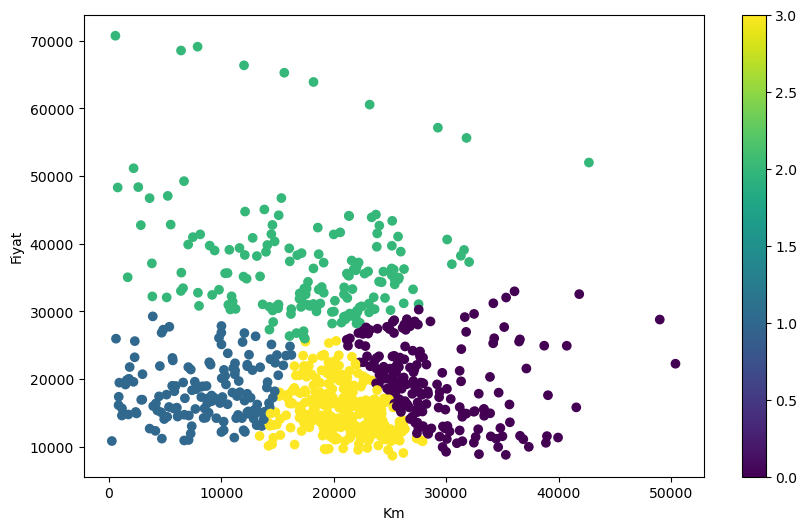

In [13]:
plt.figure(figsize= (10,6))
plt.scatter(x.Mileage, x.Price, c=tahmin)
plt.colorbar();
plt.xlabel("Km")
plt.ylabel("Fiyat")

In [14]:
# Elbow Method

In [15]:
# wcss = within cluster sum of squares

wcss=[]
ss=[]
for i in range(2,10):
    model=KMeans(i)
    model=model.fit(x)
    tahmin=model.predict(x)
    ss1=silhouette_score(x,tahmin)
    ss.append(ss1)
    print(ss1)
    wcss.append(model.inertia_)


0.4510408870102853
0.40339246923761984
0.4142768301953111
0.3547176630607021
0.3587708049264679
0.3255385413608836
0.3353615335116293
0.33644113565712197


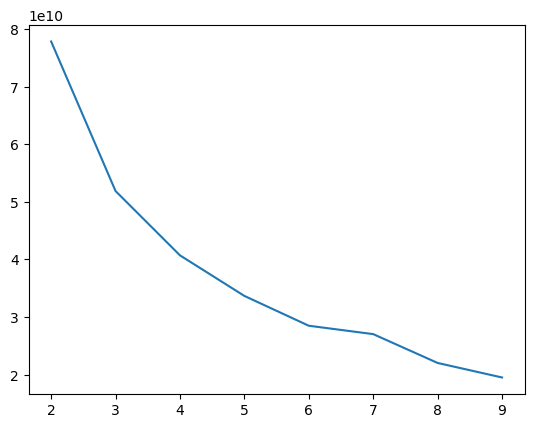

In [16]:
plt.plot(range(2,10),wcss)

In [17]:
from yellowbrick.cluster import KElbowVisualizer

In [18]:
km=KMeans()

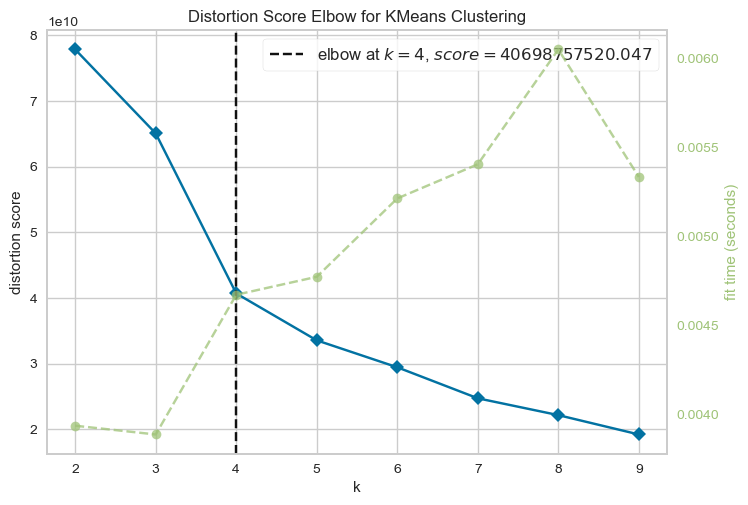

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [19]:
vis=KElbowVisualizer(km,k=(2,10))
vis.fit(x)
vis.show()